In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

unique reviewers: 39239 
unique items: 	  19914
num_ratings: 	  200000   
rating sparcity:  0.99974



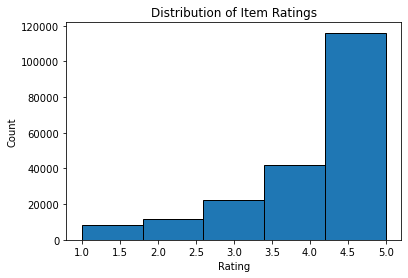

In [2]:
data = pd.read_csv("train_tab_delimited.txt", sep='\t')

# print some structure details
num_reviewers = data['reviewerID'].unique().shape[0]
num_items = data['itemID'].unique().shape[0]
num_ratings = len(data)
sparsity = 1 - num_ratings / (num_reviewers * num_items)
print("unique reviewers: {} \nunique items: \t  {}\nnum_ratings: \t  {}   \nrating sparcity:  {}\n".format(
    num_reviewers, 
    num_items, 
    num_ratings, 
    round(sparsity, 5))) # note, the data is extremely sparse

# display distribution of ratings, it is bias toward higher ratings
plt.hist(data['rating'], bins=5, ec='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Item Ratings')
plt.show()

In [3]:
data.head(5)

,reviewTime,reviewText,helpful_ratio,helpful,helpful_outOf,reviewerID,reviewHash,categories,unixReviewTime,itemID,price,rating,summary,categoryID
0,"12, 12, 2012","""I was a little afraid to get since the price ...",-1.0,0,0,U829827806,R363782763,"[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...",1355270400,I999917660,0.24,5,Awesome,0
1,"02, 6, 2013","""I wear this at zumba ..in the summer months.....",-1.0,0,0,U183746108,R127989112,"[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...",1360108800,I999917660,0.24,5,scarf,0
2,"01, 14, 2013","""I bought this scarf for my Zumba classes. It ...",-1.0,0,0,U146313905,R683302492,"[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...",1358121600,I999917660,0.24,5,Cute Scarf,0
3,"08, 4, 2013","""The belly dance hip scarf is beautiful, well ...",1.0,4,4,U888802715,R449569320,"[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...",1375574400,I999917660,0.24,3,Beautiful but stinky,0
4,"11, 23, 2013","""This is extremely beautiful and make a lot of...",-1.0,0,0,U935282947,R198932892,"[['Clothing, Shoes & Jewelry', 'Women'], ['Clo...",1385164800,I999917660,0.24,5,Belly Lady waist scarf,0


In [4]:
start = time.time()

# generate list of numeric id mappings for item ids values
unique_items = data['itemID'].unique()
item_ids = np.arange(len(unique_items)).astype('float32')
item_dict = dict(zip(unique_items, item_ids))
len(item_dict)

cols = []
for i, j in data.iterrows():
    itemID = data['itemID'][i]
    cols.append(item_dict[itemID])

# generate list of numeric id mappings for reviewer ids values
unique_reviewers = data['reviewerID'].unique()
reviewer_ids = np.arange(len(unique_reviewers)).astype('float32')
reviewer_dict = dict(zip(unique_reviewers, reviewer_ids))
len(reviewer_dict)

rows = []
for i, j in data.iterrows():
    reviewer_id = data['reviewerID'][i]
    rows.append(reviewer_dict[reviewer_id])
    
end = time.time()
print("time to execute: {}".format(end-start))

# get list of rating values
ratings = data['rating'].astype('float32').tolist()

time to execute: 45.18111610412598


In [5]:
replaced_df = pd.DataFrame(zip(rows, cols, ratings))
replaced_df.head(100)

,0,1,2
0,0.0,0.0,5.0
1,1.0,0.0,5.0
2,2.0,0.0,5.0
3,3.0,0.0,3.0
4,4.0,0.0,5.0
...,...,...,...
95,95.0,7.0,5.0
96,96.0,8.0,5.0
97,97.0,8.0,4.0
98,98.0,8.0,4.0


In [6]:
from scipy import sparse
replaced_df.columns = ['user_index', 'item_index', 'rating']
matrix = replaced_df.pivot(index='user_index', columns='item_index', values='rating')
matrix = matrix.fillna(0)
user_item_matrix = sparse.csr_matrix(matrix.values)

In [7]:
# glance into the sparse array
[((i, j), user_item_matrix[i,j]) for i, j in zip(*user_item_matrix.nonzero())]

[((0, 0), 5.0),
 ((0, 4125), 5.0),
 ((0, 13460), 5.0),
 ((0, 16465), 5.0),
 ((1, 0), 5.0),
 ((1, 5039), 5.0),
 ((1, 11725), 5.0),
 ((1, 18240), 5.0),
 ((1, 19486), 3.0),
 ((2, 0), 5.0),
 ((2, 6229), 4.0),
 ((2, 8873), 5.0),
 ((2, 19486), 5.0),
 ((3, 0), 3.0),
 ((3, 6348), 5.0),
 ((3, 11842), 5.0),
 ((3, 14755), 4.0),
 ((3, 16461), 5.0),
 ((4, 0), 5.0),
 ((4, 732), 5.0),
 ((4, 6820), 1.0),
 ((4, 15792), 5.0),
 ((5, 0), 5.0),
 ((5, 5664), 1.0),
 ((5, 7791), 5.0),
 ((5, 8876), 3.0),
 ((5, 8946), 5.0),
 ((5, 10322), 4.0),
 ((5, 14531), 4.0),
 ((5, 16570), 5.0),
 ((5, 18374), 4.0),
 ((6, 0), 5.0),
 ((6, 5954), 5.0),
 ((6, 16950), 5.0),
 ((7, 0), 4.0),
 ((7, 4932), 5.0),
 ((7, 7058), 5.0),
 ((7, 18842), 3.0),
 ((7, 19223), 3.0),
 ((8, 0), 5.0),
 ((8, 2650), 5.0),
 ((8, 4437), 5.0),
 ((8, 7390), 4.0),
 ((8, 10186), 4.0),
 ((9, 0), 5.0),
 ((9, 1706), 5.0),
 ((9, 3361), 5.0),
 ((9, 14854), 5.0),
 ((9, 19787), 5.0),
 ((10, 0), 5.0),
 ((10, 12491), 4.0),
 ((10, 19266), 3.0),
 ((11, 0), 5.0),
 ((1

### k nearest neighbor

In [27]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=11)
knn.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                 radius=1.0)

In [28]:
neighbors = np.asarray(knn.kneighbors(user_item_matrix, return_distance=False))

In [36]:
# set k
k = 10

# grab k nearest neighbors
unique_id = []
k_neighbors = []
for i in range(num_reviewers):
    unique_id.append(i)
    k_neighbors.append(list(neighbors[i][1:(k+1)]))
neighbors_df = pd.DataFrame(data={'user_index': unique_id,
                                  'neighbors': k_neighbors})

In [37]:
# get original reviewerIDs, might want to do this at the end with a lookup to ensure no bugs with ordering
neighbors_df['reviewerID'] = data['reviewerID'].unique()

# check length is number of unique reviewers: 39239
len(neighbors_df['reviewerID'].unique())

39239

In [38]:
# seems to take about 4 to 8 minutes when k = 10
start = time.time()

# calculate average of neighbors for each reviewer
knn_user_dict = {}
for index, row in neighbors_df.iterrows():
    user = row['reviewerID']
    row = row['neighbors']
    arr = np.empty((0, 1), int)
    for i in row:
        avg_rating = replaced_df.loc[replaced_df['user_index'] == i]['rating'].mean()
        arr = np.append(arr, np.array([[avg_rating]]))
    knn_rating_avg = arr.mean().astype('float32')
    knn_user_dict.update({user: knn_rating_avg})

end = time.time()
print("time elapsed: {}".format(end-start))

time elapsed: 470.3857629299164


In [39]:
# check length is number of unique reviewers: 39239
# print partial dict
len(knn_user_dict), dict(list(knn_user_dict.items())[0:20])

(39239,
 {'U829827806': 4.241667,
  'U183746108': 4.275,
  'U146313905': 4.335,
  'U888802715': 4.3311906,
  'U935282947': 4.22,
  'U828134066': 4.15,
  'U175386958': 4.0666666,
  'U629123347': 3.9045238,
  'U660283338': 3.7,
  'U257993407': 3.8116667,
  'U841844002': 4.4866667,
  'U305767347': 4.2166667,
  'U050305204': 4.133333,
  'U555306312': 4.2516665,
  'U175050634': 4.266667,
  'U536644276': 4.411667,
  'U288552612': 4.25,
  'U779423877': 3.9933333,
  'U059921763': 4.4333334,
  'U816299023': 3.9083333})

### user averages (baseline)

In [40]:
# calculate global average
global_average = data['rating'].mean()

# calculate average ratings for each user
baseline = data[['reviewerID', 'rating']]
baseline = baseline.groupby(['reviewerID'], as_index=False).mean()
#averages_df.astype({'rating': 'int32'}).dtypes
reviewers = baseline['reviewerID']
ratings = baseline['rating']

# zip into dictionary
baseline_user_dict = dict(zip(reviewers, ratings))
len(baseline_user_dict)

39239

### combine predictions

In [74]:
predictions_dict = {}
for key in knn_user_dict:
    predictions_dict[key] = (knn_user_dict[key] + baseline_user_dict[key])/2
len(predictions_dict)
predictions_dict

{'U829827806': 4.620833396911621,
 'U183746108': 4.437500047683716,
 'U146313905': 4.542500019073486,
 'U888802715': 4.365595293045044,
 'U935282947': 4.109999895095825,
 'U828134066': 4.075000047683716,
 'U175386958': 4.5333333015441895,
 'U629123347': 3.9522619247436523,
 'U660283338': 4.150000023841858,
 'U257993407': 4.40583336353302,
 'U841844002': 4.243333339691162,
 'U305767347': 4.608333349227905,
 'U050305204': 4.1666666030883786,
 'U555306312': 4.37583327293396,
 'U175050634': 4.383333444595337,
 'U536644276': 3.8308334350585938,
 'U288552612': 3.9107142857142856,
 'U779423877': 4.496666669845581,
 'U059921763': 4.7166666984558105,
 'U816299023': 4.287499984105429,
 'U701708992': 4.583333253860474,
 'U852623516': 4.0375,
 'U884468220': 3.9900232828580418,
 'U198194762': 3.785714268684387,
 'U342830229': 4.193750023841858,
 'U975618754': 3.1716666221618652,
 'U269176208': 4.171666765213013,
 'U418877400': 4.548333406448364,
 'U776176504': 4.246666669845581,
 'U821078232': 4.39

### evaluate with training data

In [75]:
temp_df = data[['reviewerID','itemID', 'rating']]

# turn off copy warning
pd.set_option('mode.chained_assignment', None)

# map predictions to reviewerID
temp_df['prediction'] = temp_df['reviewerID'].map(predictions_dict)

# calculate MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

y_true = temp_df['rating']
y_pred = temp_df['prediction']

# all metrics are higher for combined prediction despite doing better in kaggle submission
mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
print("rmse: {}\nmse:  {}\nmae:  {}".format(rmse, mse, mae))


rmse: 0.9770080021450898
mse:  0.9545446362555396
mae:  0.7821819880772543


### generate prediction file

In [42]:
################# Settings #################

# change this dict then run to update file
ratings_dict = predictions_dict

# name of file
filename = 'predictions_knn_cosine_Rating.txt'

############################################

# load rating pairs file
pairs = pd.read_csv("pairs_Rating.txt")
print("num pairs: {}".format(len(pairs)))

# lookup and fill prediction
prediction = pd.DataFrame(pairs['reviewerID-itemID'].str.split("-",expand=True))
prediction.columns = 'reviewerID', 'itemID'
prediction['rating'] = prediction['reviewerID'].map(ratings_dict)
prediction['reviewerID-itemID'] = prediction['reviewerID'] + "-" + prediction['itemID']
prediction['prediction'] = prediction['rating']
prediction = prediction.drop(['reviewerID', 'itemID', 'rating'], axis=1)

# fill in the global average for new users
prediction[['prediction']] = prediction[['prediction']].fillna(value=global_average)
print("-------------\nNaN counts: \n{}\n-------------".format(prediction.isna().sum()))

# save baseline to file
s = prediction.to_csv(None, index=False, header=True, line_terminator="\n", sep=",")

# remove empty last line
open('predictions\{}'.format(filename), 'w').write(s[:-1])
count = len(open('predictions\{}'.format(filename)).readlines(  ))
print("num rows: {}".format(count))

num pairs: 14000
-------------
NaN counts: 
reviewerID-itemID    0
prediction           0
dtype: int64
-------------
num rows: 14001
